# Predicting the probability of extramarital affairs using Logistic Regression
### When the dependent variable is binomial, meaning it takes only two distinct values ​​0 and 1, we cannot use the regression we have seen. This is because regression works under the assumption that the dependent variable is continuous. Then we use *logistic regression*.

* We'll start with an example from Wikipedia (https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study).

* Suppose we have data for a set of students.

* The independent variable (`hours`) is the number of hours a student has spent studying for a course exam.

* The dependent variable (`passed') indicates whether the student passed ($1$) or failed ($0$).

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *

In [2]:
hours = [
    0.5, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 
    2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50,  
    4.00, 4.25, 4.50, 4.75, 5.00, 5.50
]

passed = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

students = pd.DataFrame({'hours' : hours, 'passed': passed})
students.sample(5)

,hours,passed
2,1.00,0
17,4.75,1
5,1.75,0
7,2.00,0
0,0.50,0


* If we make a diagram, we will see that there is no point in trying to find a line that fits the data.

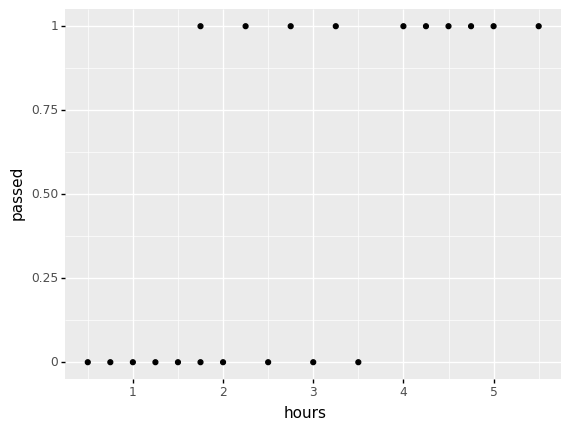

<ggplot: (331482299)>

In [3]:
ggplot(data=students) + geom_point(aes(x='hours', y='passed'))

* If we use linear regression, we find a moderate $R^2$, but an intercept that is not statistically significant.

In [4]:
students_mod = smf.ols("passed ~ hours", data=students)
students_res = students_mod.fit()
students_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 passed   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     16.29
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           0.000775
Time:                        18:16:51   Log-Likelihood:                -8.0712
No. Observations:                  20   AIC:                             20.14
Df Residuals:                      18   BIC:                             22.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1539      0.183     -0.840      0.412      -0.539       0.231
hours          0.2346      0.058      4.036      0.001       0.112       0.357
==============================================================================
Omnibus:                        0.367   Durbin-Watson:                   3.416
Prob(Omnibus):                  0.832   Jarque-Bera (JB):                0.381
Skew:                           0.270   Prob(JB):                        0.827
Kurtosis:                       2.594   Cond. No.                         7.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* By plotting the regression results, we can understand where the problem is.

* The variable `passed' is binary, but we treat it as a continuous.

* So the regression line tells us things like "the student who studied 3 hours has passed about 0.50".

* But whether you pass the course or not, there is no "about 0.50 passed".

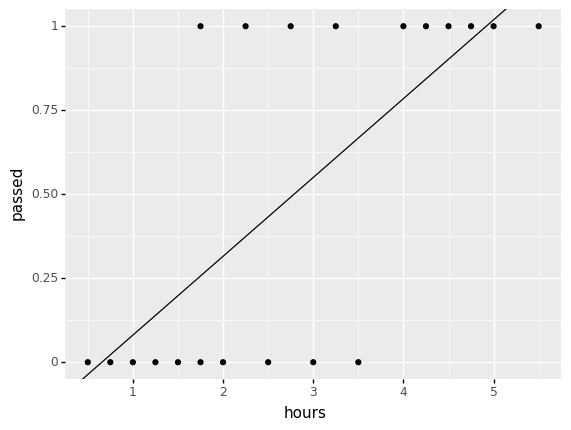

<ggplot: (331605221)>

In [5]:
ggplot(data=students) +\
    geom_point(aes(x='hours', y='passed')) +\
    geom_abline(intercept=students_res.params['Intercept'],
               slope=students_res.params['hours'])

* To overcome the problem, instead of trying to predict the variable `passed' we will turn our attention to the probability of passing the exam with $x$ hours of study.

* The probability of passing the exam with $x$ study hours is $p(x)$.

* The reason

 $$\frac{p(x)}{1 - p(x)}$$

 is called *odds ratio* or *relative probability*.

* If we take the logarithm of the relative probability we arrive at the so-called *logistic transformation* (logit, logistic transformation):

$$ \mathrm{logit}(p(x)) = \ln\frac{p(x)}{1 - p(x)} $$

* We then want to find the model parameters:

 $$ y = \alpha + \beta x,\quad y = \ln\frac{p(x)}{1 - p(x)} $$

 namely:

 $$ \mathrm{logit}(p(x)) = \ln\frac{p(x)}{1 - p(x)} = \alpha + \beta x $$

* Why do we really do this?

* Because if we solve the last equation in terms of $p(x)$ we get:

$$ p(x) = \frac {1}{1+e^{-(\alpha + \beta x)}} $$

* This function looks like an S. That's why it's called a *sigmoid function*.

* This function can fit (definitely better than the straight line) data that takes two values ​​0 and 1.

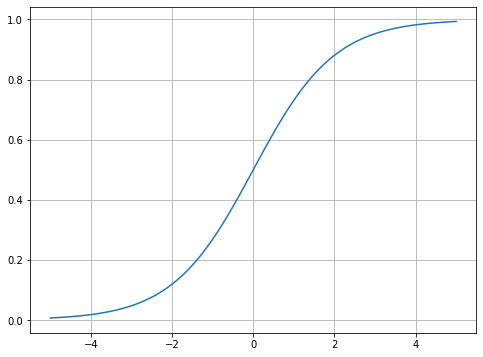

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
x = np.linspace(-5, 5,100)
y = 1 / (1 + np.exp(-x))
ax.plot(x, y)
ax.grid(True)

* In statsmodels we use the `logit()` function to do logistic regression.

In [7]:
from statsmodels.formula.api import logit
students_logit_mod = logit("passed ~ hours", data=students)
students_logit_res = students_logit_mod.fit()

students_logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 passed   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Dec 2021   Pseudo R-squ.:                  0.4208
Time:                        18:16:51   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0777      1.761     -2.316      0.021      -7.529      -0.626
hours          1.5046      0.629      2.393      0.017       0.272       2.737
==============================================================================
"""

* To get the model predictions:

In [8]:
passed_predicted = students_logit_res.predict(students['hours'])
passed_predicted

0     0.034710
1     0.049773
2     0.070892
3     0.100029
4     0.139344
5     0.190837
6     0.190837
7     0.255703
8     0.333530
9     0.421627
10    0.515011
11    0.607359
12    0.692617
13    0.766481
14    0.874448
15    0.910278
16    0.936624
17    0.955611
18    0.969097
19    0.985194
dtype: float64

* If we now plot the predictions and the data, we will indeed see that the sigmoid function approximates them.

* Note that on the $y$ axis we do not have a binary variable, but a continuous variable, the probability of passing the exam.

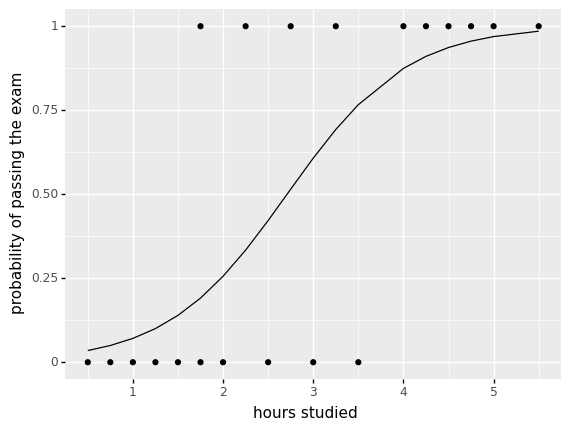

<ggplot: (331687039)>

In [9]:
ggplot(data=students) +\
    geom_point(aes(x='hours', y='passed')) +\
    geom_line(aes(x='hours'), y=passed_predicted) +\
    labs(y='probability of passing the exam', x='hours studied')

* To understand exactly what the model's findings mean, let's go back to the summary of results.

In [10]:
students_logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 passed   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Dec 2021   Pseudo R-squ.:                  0.4208
Time:                        18:16:51   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0777      1.761     -2.316      0.021      -7.529      -0.626
hours          1.5046      0.629      2.393      0.017       0.272       2.737
==============================================================================
"""

* Logistic regression does not work with the least squares method, but with the *maximum likelihood* method.

* That's why there is no $R^2$.

* There is a pseudo-$R^2$, which is called McFadden's pseudo-$R^2$.

* Pseudo-$R^2$ can have much lower values ​​than $R^2$: values ​​from $0{,}2$ to $0{,}4$ can correspond to a very good model.

* Log-Likelihood, LL-Null, LLR p-value are also metrics that help us evaluate the model.

* Results show that studying is related to exam success.

* The logarithm of the relative odds is:

$$ \ln{\frac{p(x)}{1 - p(x)}} = -4{,}0777 + 1{,}5046 x $$

* With a null read, the logarithm of the relative odds is equal to $-4{,}0777$.

* An additional hour of study increases the log of the relative odds by $1{,}5046$.

* If we take the logarithm we get:

$$ \frac{p(x)}{1 - p(x)} = \exp{(-4{,}0777 + 1{,}5046 x)} = e^{(-4{,}0777 + 1{,}5046 x)}$$

* So an extra hour of study multiplies the relative chances of success by $e^{1{,}5046} \approx 4{,}5$.

* With a zero read, the relative success probabilities are $e^{-4{,}0777} \approx 0{,}017 = 1{,}7\%$.

* Solving in terms of $p(x)$ we have:

$$ p(x) = \frac{1}{1 + e^{(4{,}0777 - 1{,}5046x)}} $$

* Thus, we can calculate the probability of success for different hours of study.

* Looks like the study is paying off!

In [11]:
study_hours = np.arange(1, 6)
intercept = students_logit_res.params['Intercept']
hours_coeff = students_logit_res.params['hours']
probability_passing = 1 / (1 + np.exp(-(intercept + hours_coeff*study_hours)))
print('study hours', study_hours)
print('probability of passing', probability_passing)

study hours [1 2 3 4 5]
probability of passing [0.07089196 0.25570318 0.60735865 0.8744475  0.96909707]


* If we have more than one independent variable, we can apply multiple logistic regression.

* We will use data from a 1974 survey of extramarital affairs in the US.

In [12]:
print(sm.datasets.fair.SOURCE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm



In [13]:
print(sm.datasets.fair.NOTE[8:]) # get rid of empty lines

Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
                  

* We will read the data and create a new binary variable `affair` that will indicate whether or not there is an extramarital affair.

* Specifically, if present the value of `affair` will be 1, otherwise it will be 0.

In [14]:
affair_df = sm.datasets.fair.load_pandas().data

affair_df['affair'] = (affair_df['affairs'] > 0).astype(float)
affair_df.sort_values(by='affair', inplace=True)
affair_df.reset_index(inplace=True, drop=True)
affair_df.sample(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
1157,5.0,17.5,0.5,0.0,3.0,12.0,3.0,2.0,0.000000,0.0
3953,4.0,27.0,2.5,0.0,3.0,14.0,3.0,5.0,0.000000,0.0
3249,5.0,27.0,6.0,0.0,1.0,16.0,5.0,5.0,0.000000,0.0
1747,5.0,22.0,2.5,0.0,2.0,14.0,3.0,5.0,0.000000,0.0
998,3.0,22.0,2.5,0.0,1.0,14.0,3.0,2.0,0.000000,0.0
5962,4.0,27.0,9.0,2.0,1.0,17.0,4.0,5.0,2.177776,1.0
6108,5.0,42.0,23.0,3.0,2.0,14.0,3.0,5.0,0.852174,1.0
666,4.0,27.0,2.5,0.0,3.0,17.0,5.0,5.0,0.000000,0.0
3873,4.0,37.0,23.0,5.5,2.0,12.0,3.0,2.0,0.000000,0.0
4845,4.0,27.0,6.0,0.0,2.0,12.0,3.0,4.0,4.666666,1.0


* Before we proceed, let's get an overview.

* What is the overall probability of an extramarital affair?

In [15]:
affair_df['affair'].sum() / affair_df['affair'].count()

0.3224945020420987

* But we want to go deeper.

* For this purpose we will do logistic regression.

* The dependent variable will be the `affair` column we created.

In [16]:
affair_mod = logit("affair ~ occupation + educ + occupation_husb"
                   " + rate_marriage + age + yrs_married + children"
                   " + religious", affair_df).fit()

affair_mod.summary()

Optimization terminated successfully.
         Current function value: 0.545314
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6357
Method:                           MLE   Df Model:                            8
Date:                Thu, 16 Dec 2021   Pseudo R-squ.:                  0.1327
Time:                        18:16:51   Log-Likelihood:                -3471.5
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                5.807e-224
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.7257      0.299     12.470      0.000       3.140       4.311
occupation          0.1602      0.034      4.717      0.000       0.094       0.227
educ               -0.0392      0.015     -2.533      0.011      -0.070      -0.009
occupation_husb     0.0124      0.023      0.541      0.589      -0.033       0.057
rate_marriage      -0.7161      0.031    -22.784      0.000      -0.778      -0.655
age                -0.0605      0.010     -5.885      0.000      -0.081      -0.040
yrs_married         0.1100      0.011     10.054      0.000       0.089       0.131
children           -0.0042      0.032     -0.134      0.893      -0.066       0.058
religious          -0.3752      0.035    -10.792      0.000      -0.443      -0.307
===================================================================================
"""

* A one-unit increase in the type of employment increases by $0{,}1602$ the logarithm of the relative probability of having an extramarital relationship.

* Equivalently, the relative probability increases by $e^{0{,}1602} \approx 1{,}1737$ or about $17\%$.

In [17]:
affair_mod.params['occupation']

0.16023383319081705

* An additional year of marriage increases by $0{,}11$ the logarithm of the relative probability of having an extramarital affair.

* Equivalently, the relative probability increases by $e^{0{,}11} \approx 1{,}12 $ or about $12\%$ .

In [18]:
affair_mod.params['yrs_married']

0.11001794098252028

* A one-unit increase in marriage assessment reduces the logarithm of the relative probability of having an extramarital affair by $0{,}7161$.

* Equivalently, since $e^{-0{,}7161} \approx 0{,}4886$, the relative probability of having an extramarital affair is reduced by about $100 - 0{,}4886 \approx 51\%$.

In [19]:
affair_mod.params['rate_marriage']

-0.7161071050802287

* A one-unit increase in religiosity reduces by $0{,}3752$ the logarithm of the relative probability of having an extramarital affair.

* Equivalently, since $e^{-0{,}3752} \approx 0{,}6872$, the relative probability of having an extramarital affair decreases by about $100 - 68{,}72 \approx 31\%$.

In [20]:
affair_mod.params['religious']

-0.3751576526839532